In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from random import randrange, uniform
import math
import random

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
petal_len_width = iris.data[:, 2:]  # last two columns: petal length (cm) and petalwidth (cm)

Text(0, 0.5, 'Petal width')

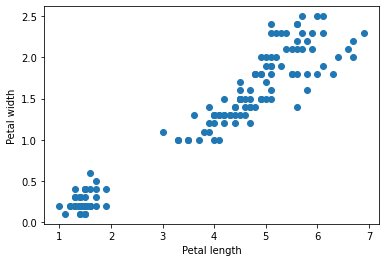

In [7]:
plt.scatter(petal_len_width[:, 0], petal_len_width[:, 1])
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [8]:
min(petal_len_width[:, 0]), max(petal_len_width[:, 0])

(1.0, 6.9)

In [9]:
min(petal_len_width[:, 1]), max(petal_len_width[:, 1])

(0.1, 2.5)

In [10]:
def random_start():
    random_petal_len = round(uniform(min(petal_len_width[:, 0]), max(petal_len_width[:, 0])), 1)
    random_petal_width = round(uniform(min(petal_len_width[:, 1]), max(petal_len_width[:, 1])), 1)
    return random_petal_len, random_petal_width

In [11]:
#random.seed(178)
random.seed(170)
r1 = random_start()
r2 = random_start()
r3 = random_start()

In [12]:
r1,r2,r3

((5.6, 2.3), (4.5, 0.9), (2.4, 0.7))

Text(0, 0.5, 'Petal width')

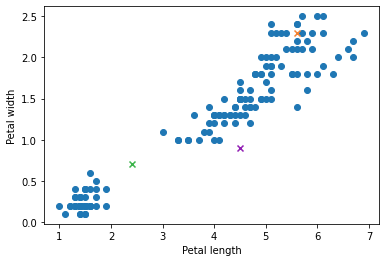

In [13]:
plt.scatter(petal_len_width[:, 0], petal_len_width[:, 1])
plt.scatter(r1[0], r1[1], marker='x', c='#f58231')
plt.scatter(r2[0], r2[1], marker='x', c='#911eb4')
plt.scatter(r3[0], r3[1], marker='x', c='#3cb44b')
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [14]:
def dist_calc(petal_coords, centroid_coords):
    return math.sqrt(pow(centroid_coords[0] - petal_coords[0], 2) + pow(centroid_coords[1] - petal_coords[1], 2))

In [16]:
x_first_array = []
y_first_array = []
x_second_array = []
y_second_array = []
x_third_array = []
y_third_array = []

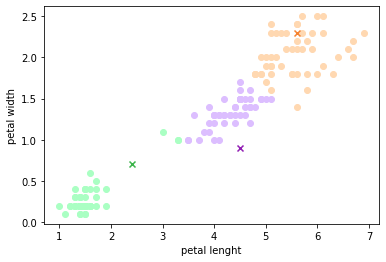

Apricot cluster centroid movement: 0.040000000000000036 0.27
Lavender cluster centroid movement: 0.17999999999999972 -0.44000000000000006
Mint cluster centroid movement: 0.8399999999999999 0.41


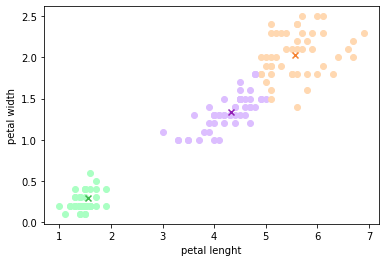

Apricot cluster centroid movement: -0.020000000000000462 -0.010000000000000231
Lavender cluster centroid movement: 0.03000000000000025 0.0
Mint cluster centroid movement: 0.050000000000000044 0.019999999999999962


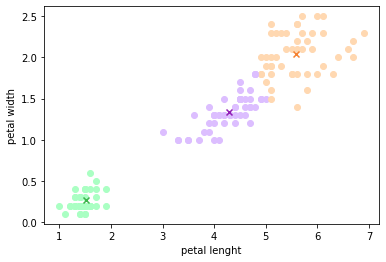

Apricot cluster centroid movement: 0.0 0.0
Lavender cluster centroid movement: 0.0 0.0
Mint cluster centroid movement: 0.010000000000000009 0.010000000000000009


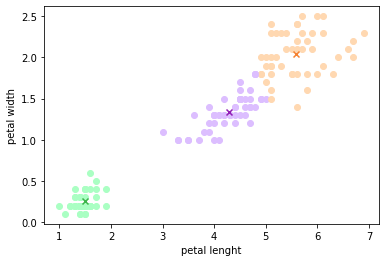

Apricot cluster centroid movement: -0.009999999999999787 0.0
Lavender cluster centroid movement: 0.009999999999999787 0.0
Mint cluster centroid movement: 0.010000000000000009 0.0


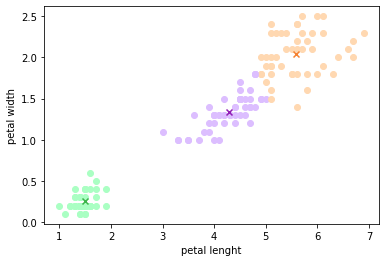

Apricot cluster centroid movement: 0.0 0.0
Lavender cluster centroid movement: 0.0 0.0
Mint cluster centroid movement: 0.010000000000000009 0.0


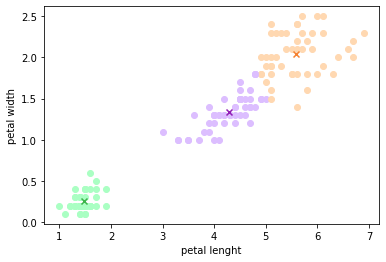

Apricot cluster centroid movement: 0.0 0.0
Lavender cluster centroid movement: 0.0 0.0
Mint cluster centroid movement: 0.0 0.010000000000000009


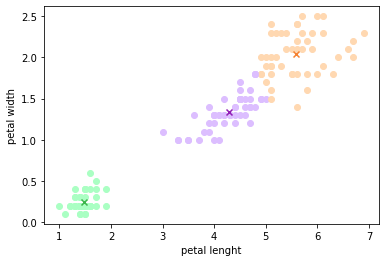

Apricot cluster centroid movement: 0.0 0.0
Lavender cluster centroid movement: 0.0 0.0
Mint cluster centroid movement: 0.0 0.0
iteration finished


In [17]:
while(True):
    for petal in petal_len_width:
        dist_first = dist_calc(petal, r1)
        dist_second = dist_calc(petal, r2)
        dist_third = dist_calc(petal, r3)
        if dist_first < dist_second and dist_first < dist_third:
            plt.scatter(petal[0], petal[1], marker='o', c='#ffd8b1') #Apricot
            x_first_array.append(petal[0])
            y_first_array.append(petal[1])
        elif dist_second < dist_first and dist_second < dist_third:
            plt.scatter(petal[0], petal[1], marker='o', c='#dcbeff') #Lavender
            x_second_array.append(petal[0])
            y_second_array.append(petal[1])
        else:
            plt.scatter(petal[0], petal[1], marker='o', c='#aaffc3') #Mint
            x_third_array.append(petal[0])
            y_third_array.append(petal[1])
            
    plt.scatter(r1[0], r1[1], marker='x',c='#f58231')
    plt.scatter(r2[0], r2[1], marker='x', c='#911eb4')
    plt.scatter(r3[0], r3[1], marker='x', c='#3cb44b')
    plt.ylabel('petal width')
    plt.xlabel('petal lenght')
    plt.show()
    
    #new coords of centroids are calculated
    new_x_first = round(sum(x_first_array) / len(x_first_array), 2)
    new_y_first = round(sum(y_first_array) / len(y_first_array), 2)
    new_x_second = round(sum(x_second_array) / len(x_second_array), 2)
    new_y_second = round(sum(y_second_array) / len(y_second_array), 2)
    new_x_third = round(sum(x_third_array) / len(x_third_array), 2)
    new_y_third = round(sum(y_third_array) / len(y_third_array), 2)

    print("Apricot cluster centroid movement:", r1[0] - new_x_first, r1[1] - new_y_first)
    print("Lavender cluster centroid movement:", r2[0] - new_x_second, r2[1] - new_y_second)
    print("Mint cluster centroid movement:", r3[0] - new_x_third, r3[1] - new_y_third)
    
    #exit conditions
    if  ((abs(r1[0] - new_x_first) < 0.001 and abs(r1[1] - new_y_first) < 0.001) 
        and (abs(r2[0] - new_x_second) < 0.001 and abs(r2[1] - new_y_second) < 0.001) 
        and (abs(r3[0] - new_x_third) < 0.001 and abs(r3[1] - new_y_third) < 0.001)):
        print("iteration finished")
        break
    
    #new centroids coords are assigned
    r1=(new_x_first, new_y_first)
    r2=(new_x_second, new_y_second)
    r3=(new_x_third, new_y_third)